In [1]:
import warnings
warnings.filterwarnings('ignore')

# Lab 4 - Data (ETL) - Solution

In [2]:
%matplotlib inline

## General Instructions

In this course, Labs are the chance to applying concepts and methods discussed in the module.
They are a low stakes (pass/fail) opportunity for you to try your hand at *doing*.
Please make sure you follow the general Lab instructions, described in the Syllabus.
The summary is:

* Discussions should start as students work through the material, first Wednesday at the start of the new Module week. 
* Labs are due by Sunday. 
* Lab solutions are released Monday.  
* Post Self Evaluation and Lab to Lab Group on Blackboard and Lab to Module on Blackboard on Monday.

The last part is important because the Problem Sets will require you to perform the same or similar tasks without guidance.
Problem Sets are your opportunity to demonstrate that you understand how to apply the concepts and methods discussed in the relevant Modules and Labs.

## Specific Instructions

1.  For Blackboard submissions, if there are no accompanying files, you should submit *only* your notebook and it should be named using *only* your JHED id: fsmith79.ipynb for example if your JHED id were "fsmith79". If the assignment requires additional files, you should name the *folder/directory* your JHED id and put all items in that folder/directory, ZIP it up (only ZIP...no other compression), and submit it to Blackboard.

    * do **not** use absolute paths in your notebooks. All resources should located in the same directory as the rest of your assignments.
    * the directory **must** be named your JHED id and **only** your JHED id.
    * do **not** return files provided by us (data files, .py files)

2. Data Science is as much about what you write (communicating) as the code you execute (researching). In many places, you will be required to execute code and discuss both the purpose and the result. Additionally, Data Science is about reproducibility and transparency. This includes good communication with your team and possibly with yourself. Therefore, you must show **all** work.

3. Avail yourself of the Markdown/Codecell nature of the notebook. If you don't know about Markdown, look it up. Your notebooks should not look like ransom notes. Don't make everything bold. Clearly indicate what question you are answering.

4. Submit a cleanly executed notebook. The first code cell should say `In [1]` and each successive code cell should increase by 1 throughout the notebook.

**Note** This assignment will have multiple files. Follow those instructions.

## Lab

**Reid's** is a small breakfast stand that sells drinks (coffee, tea, sodas) and food (egg & sausage, oatmeal) in a commercial downtown area, Monday through Friday, from 8a until 11am.
Although their menu is small, they do try to cater to a wide variety of diets and thus provide both vegan and keto options for most of their meals.
They started using Ordr as their Point of Sale system about two months ago and are on the Basic Plan.

Under the Basic Plan, they are able to use the Ordr API to access orders.
This order information comes in the form of a denormalized JSON document.
In order to make any sense of things, you need to normalize it in the Datawarehouse.

1. You are not actually going to access an external API. Use the provided JSON file as the data that the API would return.
2. You are not actually going to use a datawarehouse. Instead you will use a SQLite database.

**Note** We sometimes get strange questions about the use of SQLite like, "do you really use SQLite in production?". We use SQLite jor this Lab for the following reasons:

1. SQLite is a real RDBMS.
2. SQLite uses real SQL. SQL may be the most important skill you can have as a Data Scientist doing Data Science.
3. Most importantly, the database itself is a standalone file that you can submit to us.

That being said, under some and somewhat weird circumstances, I have used SQLite on real projects before. However, the learning objective is not SQLite, SQLite is  tool.

**Note**
We assume you know the basics of RDMBS in this course.
That you understand what "normalized" and "denormalized" data means and that you know about primary and foreign keys.
This [article](https://www3.ntu.edu.sg/home/ehchua/programming/sql/Relational_Database_Design.html) does talk about the major points.
Additionally, we assume you know SQL and DDL.
If you do not, this Lab will be more challenging than usual and you should start early.

**Important - You must not use Pandas for any part of this assignment.**
Why not?
Because you should know how to do these things without relying on Pandas.

## Lab

**Reid's** is a small breakfast stand that sells drinks (coffee, tea, sodas) and food (egg & sausage, oatmeal) in a commercial downtown area, Monday through Friday, from 8a until 11am.
Although their menu is small, they do try to cater to a wide variety of diets and thus provide both vegan and keto options for most of their meals.
They started using Ordr as their Point of Sale (POS) system about two months ago and are on the Basic Plan.

Under the Basic Plan, they are able to use the Ordr API to access orders.
This order information comes in the form of a denormalized JSON document.
In order to make any sense of things, you need to normalize it in the Datawarehouse.

1. You are not actually going to access an external API. Use the provided JSON file as the data that the API would return.
2. **You are doing "ETL in the Large" in this assignment.** You are going to build a datawarehouse in SQLite, *not* an application database. This difference is substantial. Refer to the draft chapter of Fundamentals for some of the differences.

**Note** We sometimes get strange questions about the use of SQLite like, "do you really use SQLite in production?". We use SQLite jor this Lab for the following reasons:

1. SQLite is a real RDBMS.
2. SQLite uses real SQL. SQL may be the most important skill you can have as a Data Scientist doing Data Science.
3. Most importantly, the database itself is a standalone file that you can submit to us.

That being said, under some and somewhat weird circumstances, I have used SQLite on real projects before. However, the learning objective is not SQLite, SQLite is  tool.

<div style="background: lemonchiffon; margin:20px; padding: 20px;">
    <strong>Note</strong>
    <p>You may need to install <tt>sqlite</tt>. It is normally on MacOs and may be on Linux already.</p>
</div>

**Note**
We assume you know the basics of RDMBS and SQL DDL in this course (It is in the course prerequisites!).
That you understand what "normalized" and "denormalized" data means and that you know about primary and foreign keys.
This [article](https://www3.ntu.edu.sg/home/ehchua/programming/sql/Relational_Database_Design.html) does talk about the major points.
Additionally, we assume you know SQL and DDL.
If you do not, this Lab will be more challenging than usual and you should start early.

**Important - You must not use Pandas for any part of this assignment.**
Why not?
Because you should know how to do these things without relying on Pandas.

## Part 1

### Learning Objectives

* investigate the structure of data acquired from a 3rd party.
* convert denormalized data into normalized data, according to common data warehouse practices.
* design a data warehouse to store production data acquired from a 3rd party.
* write data to a data warehouse.

This assignment is not about tools *per se* but about broader skills and concepts.

You will be creating the following files:

1. **reids.sql** - this file will create the database structure using DDL. Make sure you review the data and sketch out your design.
2. **reids.db** - this is the actual database, our data warehouse.

```
> sqlite3 reids.db < reids.sql
```

will create the database and all the tables.
The database will be empty at this point.

<div style="background: lemonchiffon; margin:20px; padding: 20px;">
    <strong>Note</strong>
    <p>"<tt>></tt>" represents the command line. Your sqlite executable may have a different name.</p>
</div>

3. **reids.py** - this program will parse the JSON file and fill the database.

```
> python reids.py
```

Unfortunately, the documentations for the Ordr API is sparse, here is an example of one order:

```
{'items': [
    {'name': 'coffee', 'price': 2.75},
    {'name': 'flavor shot', 'price': 1.0}
    ],
'charges': {
    'date': '01/04/21 10:22',
    'subtotal': 3.75,
    'taxes': 0.26,
    'total': 4.01},
'payment': {
    'card_type': 'visa',
    'last_4_card_number': '0465',
    'zip': '21217',
    'cardholder': 'Christina Sampson',
    'method': 'credit_card'}}
```

**The date format is Month/Day/Year**

Make sure you look through the data to see what values are possible for each of the fields.
The standards of normalization/denormalization for datawarehouses are slightly different or can be different than regular production RDMBS systems.
For example, we might be tempted to create a `menu_items` table:

```
id    name                 price
1     coffee               2.75
2     flavor shot          1.00
3     egg salad sandwich   4.50
```

An issue arises if we change the name to "Kona Coffee" because it will change it *for past purchases*.
That is, customers in the past bought based on the name "Coffee" and not "Kona Coffee".
This might be important.
Even worse, if we change the price to \\$3.00, it changes it for all past purchases and that is clearly wrong.

In a production RDMBS we often want the data to change everywhere it is used.
If "Steve" changes his name to "Sam", we want that to be reflected in any query and report.
For datawarehousing, though, we want to preserve the historical fidelity of the data.
This means we have a tendency to normalize *less* than we would otherwise do.
It's worth noting that there is a trend to preserve the historical fidelity in production databases as well by things like soft deletes.

This means the main issue for the Ordr data is storing the three main entities and creating primary/secondary keys.
You will need to create these.

All of this "parsing and massaging" work will be done in the `reids.py` file.
It will contain the code to parse the JSON file and fill the database, performing whatever normalization and standardization is required as well as creating whatever primary and foreign key relationships seem reasonable.

You must create the following tables in the database:

1. `items`
2. `charges`
3. `payments`

but you can add additional tables as necessary (it is not uncommmon to include tables in datawarehouses that support analytics such as information about business dates).

**Note** Feel free to develop reids.py as a Notebook and then generate the .py from the .ipynb file...just make sure you only include the .py file and that it will run from the command line as specified above and you have commented out any debug/chatter.

**Important**
There are some "gotchas".
1. When inserting data into the database, don't forget to the commit.
2. If you must reconstruct your database, make sure you "free" all references to it. If you use a script to change it but it's open your notebook, the open version in the notebook won't necessarily see those changes.  You'll need to get a new connection.

When you are done with this part, you should be able to proceed to Part 2.

<div style="background: peachpuff; margin:20px; padding: 20px;">
    <strong>Rubric</strong>
    <ul>
        <li>If <strong>any</strong> of the above code and SQL are in this file, that is incorrect and a "C".</li>
        <li>If you used Pandas at any point, that is incorrect, and an "F"</li>.
    </ul>
</div>

**Everything having to do with parsing the JSON file from Ordr and setting up the "data warehouse" should be done in the three files described above and not in this Notebook.**

## Part 2

### Learning Objectives

You almost never start out with a Notebook and start pulling data. 
The idea that you launch Jupyter Notebook and load a readily available CSV is an incredibly artificial artifact of school (if you had to pull data The Real Way(tm) for every assignment, we'd never get anything done).

Instead, you are more likely to start out with a database and you run queries directly against the database, finding out where and what everything is, answering some initial questions.

* Run queries against an RDBMS to answer basic business questions.

Some data science projects are literally just this: someone asks a question, you investigate the data, you run a query using something like [MySQL Workbench](https://www.mysql.com/products/workbench/), [Toad](https://www.toadworld.com/products/toad-for-sql-server) (Windows Only) or [Postico](https://eggerapps.at/postico/) (MacOS Only). There are also generic SQL clients. For example, [VSCode](https://code.visualstudio.com/) has SQL extensions.

You will mimic that experience here by using only the [sqlite3](https://docs.python.org/3/library/sqlite3.html) Python library (included in the base installiation, link is to documentation).
As with Part 1, you may *not* use Pandas for this part.
Additionally, you *must* not print out native Python data structures.
[Tabulate](https://pypi.org/project/tabulate/) has been provided in the environment.yml for your use.


For Part 2, everything should be done here, in this notebook.

**Note**
The general format is discuss/code/discuss.
For the questions below, you should be able to:

1. explain what the query does (discuss)
2. execute and display the query result (code)
3. interpret the result (discuss)

All three are required for full credit on something like Problem Set so you should practice the triad here. It is permissible to use a query to get raw data (and show it in a table) and then perform a calculation with that raw data (just add a code cell). However, you should do as much as possible in SQL.

<div style="background: lemonchiffon; margin:20px; padding: 20px;">
    <strong>Note</strong>
    <p>
There is a significant work/payoff imbalance here and this reflects real life.
Setting up the data warehouse is 80% of the effort but only 20% of the credit.
Your boss just doesn't care about your struggles with the data, they only care about answering the queries.
As a result, the queries (Part 2) may be 20% of the effort but they're 80% of the grade.
They're proof that you did Part 1 correctly.
If you don't get to the queries, if you don't do them right, there's no proof.
    </p>
</div>

Using the database `reids.db` and SQL please answer the following questions:

In [3]:
from tabulate import tabulate
import sqlite3

In [4]:
con = sqlite3.connect('reids.db')

### Question 1.

What were Reid's order count and gross revenue by day for the two month period?

There is no date type in SQLite (SQLite is actually dynamically typed).
There are at least two possible alternatives here.
First, one could have extracted the date and time components of date in the charges table into two columns using Python, when the table was created.
Second, one can just parse the string "04/01/2021 8:49" using the SQLite String functions.

Stripping the date in charges to just the date value, we can do a simple SELECT against the date and total in the charge table and a GROUP BY to collect all the charges for a given day and a SUM aggregate function total the totals.

In [5]:
query = """
SELECT 
    SUBSTR(date, 0, INSTR(date, ' ')) AS _date, 
    COUNT(*) AS _count,
    SUM(total) AS _total
FROM charges
GROUP BY _date
ORDER BY _date
"""
result1 = list(con.execute(query))
tabulate(result1, headers=["date", "count", "total"], tablefmt='html')

date,count,total
04/01/21,34,188.87
04/02/21,51,265.11
04/05/21,57,339.77
04/06/21,48,276.09
04/07/21,32,188.63
04/08/21,58,345.92
04/09/21,62,341.58
04/12/21,55,294.54
04/13/21,32,167.5
04/14/21,54,288.41


Every five days, two days are missing.
Reid's is only open weekdays so this makes sense.
The data spans from 4/1/2021 to 5/28/21 (5/31 was a holiday in the US!).

<div style="background: peachpuff; margin:20px; padding: 20px;">
    <strong>Rubric</strong>
    <ul>
        <li>All results should be nicely formatted and not "raw" Python data structures.</li>
        <li>There should always be a discussion of the results</li>
    </ul>
</div>


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

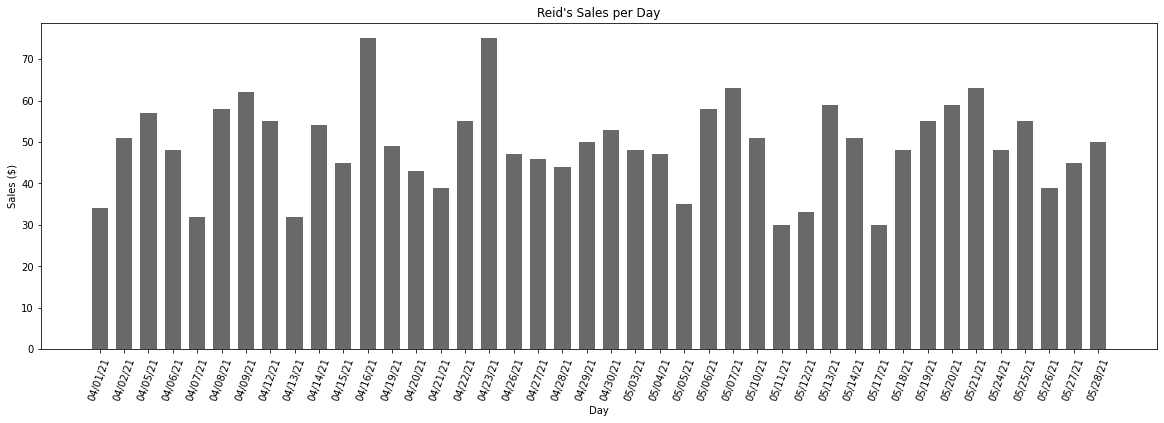

In [7]:
x = range(len(result1))
width = 1/1.5

figure = plt.figure(figsize=(20, 6))

axes = figure.add_subplot(1, 1, 1)
axes.bar(x, [r[1] for r in result1], width, color="dimgray", align="center")
axes.set_xticks(x)
axes.set_xticklabels([r[0] for r in result1])
axes.set_title( "Reid's Sales per Day")
axes.set_xlabel("Day")
axes.set_ylabel( "Sales ($)")
axes.xaxis.grid(False)
plt.setp( axes.xaxis.get_majorticklabels(), rotation=70)

plt.show()
plt.close();

This looks a little cyclical.

<div style="background: peachpuff; margin:20px; padding: 20px;">
    <strong>Rubric</strong>
    <ul>
        <li>Did you think to make a chart?</li>
    </ul>
</div>


### Question 2.

What is Reid's average order count and gross revenue by day of the week?

We can basically take the data from the previous query and map each date to a day of the week.
Because we set up a calendar table, we can join to that table.
An alternative would be run the query from the last question and do the actual computation in Python (which is also just fine).
If we find we want to do these kinds of calculations often, the calendar table (and any other "support" tables is the way to go in the long run).

In [8]:
query = """
WITH daily_charges(date, count, total) AS (
SELECT 
    SUBSTR(date, 0, INSTR(date, ' ')) AS _date, 
    COUNT(*) AS _count,
    SUM(total) AS _total
FROM charges
GROUP BY _date
ORDER BY _date
)
SELECT
    day_of_week,
    AVG(count),
    AVG(total)
FROM calendar cal
JOIN daily_charges ch ON cal.date = ch.date
GROUP BY day_of_week
"""
result2 = list(con.execute(query))
tabulate(result2, headers=["Day", "Average"], tablefmt='html')

,Day,Average
Friday,60.3333,325.244
Monday,48.125,276.631
Thursday,51.4444,292.967
Tuesday,43.625,247.23
Wednesday,41.375,232.758


It seems that Fridays have higher than average sales but this is only eight-ish weeks worth of data.
Wednesdays have the lowest sales.

<div style="background: lemonchiffon; margin:20px; padding: 20px;">
    <strong>Note</strong>
    <p>When conducting analytics, we ask ourselves three things (in general):</p>
    <ol>
        <li>What do we expect to see?</li>
        <li>(do the analysis)</li>
        <li>Is what we see important?</li>
        <li>Is what we see believable?</li>
   </ol>
    <p>We will talk more about this in the EDA module and the Statistical Inference module but we never "just" mess with data and believe it.</p>
</div>

### Question 3.

How many cups of coffee does Reid's sell per day, on average?




In [9]:
query = """
SELECT COUNT(_date), SUM(coffees)
FROM (
    SELECT 
        SUBSTR(date, 0, INSTR(date, ' ')) AS _date,
        COUNT(*) AS coffees
    FROM items it
    JOIN charges ch ON it.charge_id = ch.id
    WHERE it.name = 'coffee'
    GROUP BY _date
) a
"""
result3 = list(con.execute(query))
tabulate(result3, headers=["Days", "Coffees"], tablefmt='html')

Days,Coffees
42,1515


In [10]:
1515/42

36.07142857142857

Reid's sells about 36 cups of coffee a day.
It might be interesting to see if this follows the same pattern as orders overall.

<div style="background: peachpuff; margin:20px; padding: 20px;">
    <strong>Rubric</strong>
    <ul>
        <li>It's okay to mix SQL to get data and Python to process it and analyze it. This is actually expected.</li>
    </ul>
</div>


### Question 4.

What proportion of orders contain "up charges" like flavor shots, vegan or keto substitutions?

There are a variety of ways to accomplish this particular task.
In general, I'm not a fan of performing multiple calculations in a single query (the parts and the total or divisor) so this is another case where we can use the query to get the raw data and then do the computation.

We first calculate all the orders with "special charges" (CTE) and then perform a LEFT OUTER JOIN from all orders (charges) to those with up charges (special charges).
Use an outer join when you expect the JOIN to fail and still need values from tables on the left.
We transform the NULLs for the column 'special' to "no" and then do a simple aggregation, grouping by special and counting the orders.

This gives us counts for those with ("yes") and without ("no") up charges and the rest is just arithmetic.

In [11]:
query = """
SELECT special, COUNT(*)
FROM (
    WITH special_charges(charge_id, special) AS (
        SELECT 
            ch.id,
            'yes'
        FROM charges ch
        JOIN items it ON ch.id = it.charge_id
        WHERE it.name IN ('espresso', 'flavor shot', 'keto', 'vegan')
        GROUP BY ch.id
    )
    SELECT IFNULL(special, 'no') AS special, 1
    FROM charges ch
    LEFT OUTER JOIN special_charges sc ON sc.charge_id = ch.id
) a
GROUP BY special
;
"""
result4 = list(con.execute(query))
tabulate(result4, headers=["Up Charge", "Count"], tablefmt='html')

Up Charge,Count
no,1363
yes,708


In [12]:
708/(708+1363)

0.3418638338966683

34.2% of all orders contained up charges.
It might be interesting to see the distribution of the up charges (perhaps it's not worthwhile to have a keto option to everything).

### Question 5.

Reid's considers someone to be a "regular" if they come at least 3 out of 5 days per week. How many regulars do you estimate there are and what are their names? How many days per week do they each come on average? What are the limits of this calculation based on the available data?

We know there are 42 days and 3/5 = 60% so what we would like to know is that if there are any customers who came more than 25 days in the 42 day period.

We first need to JOIN charges to cardholders, making sure we pick only those payments that represent credit cards.
Assuming one visit per day (ie, nobody makes more than one purchase per day, which happens to be true), we can sum up the visits and then look only at those customers that had 25 or more.

For the average, it's easier to do the calculation in Python (especially since we also wanted the underlying data).

In [13]:
query = """
SELECT customer, visits
FROM (
    SELECT 
        cardholder AS customer,
        COUNT(*) AS visits
    FROM (
        SELECT cardholder, SUBSTR(date, 0, INSTR(date, ' ')) AS _date
        FROM payments pay
        JOIN charges ch ON pay.id = ch.payment_id
        WHERE cardholder IS NOT NULL
    )a
    GROUP BY customer
    ORDER BY visits DESC
) b
WHERE visits > 25
"""
result5 = list(con.execute(query))
tabulate(result5, headers=["Up Charge", "Count"], tablefmt='html')

Up Charge,Count
Rebecca Garza,35
Lisa Aguilar,34
Gina Green,34
Anthony Martin,34
Wesley Garcia,33
Mary Jones,33
Gregory Jones,33
Eric Bruce,33
Cassandra Francis,33
Emily Dennis,32


In [14]:
len(result5)

30

In [15]:
sum([c[1] for c in result5])/len(result5)

30.566666666666666

Reid's has 30 regular customers based on the available data.
The range is from 27 to 35 days in 42 days (64% to 83% of the time).
The average number of days that a regular comes is 31 (74% of the time).

The limit of the data is that we can only track credit card purchases.
If someone comes every day and spends cash, we'd never know (at least from the data).